# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [2]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 17s 0us/step


In [4]:
class_names = [
    "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle",
    "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle",
    "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur",
    "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house", "kangaroo", "keyboard",
    "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain",
    "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear", "pickup_truck", "pine_tree",
    "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray", "road", "rocket",
    "rose", "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake", "spider",
    "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone", "television", "tiger", "tractor",
    "train", "trout", "tulip", "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"
]

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)
Data type: uint8
Min pixel value: 0
Max pixel value: 255


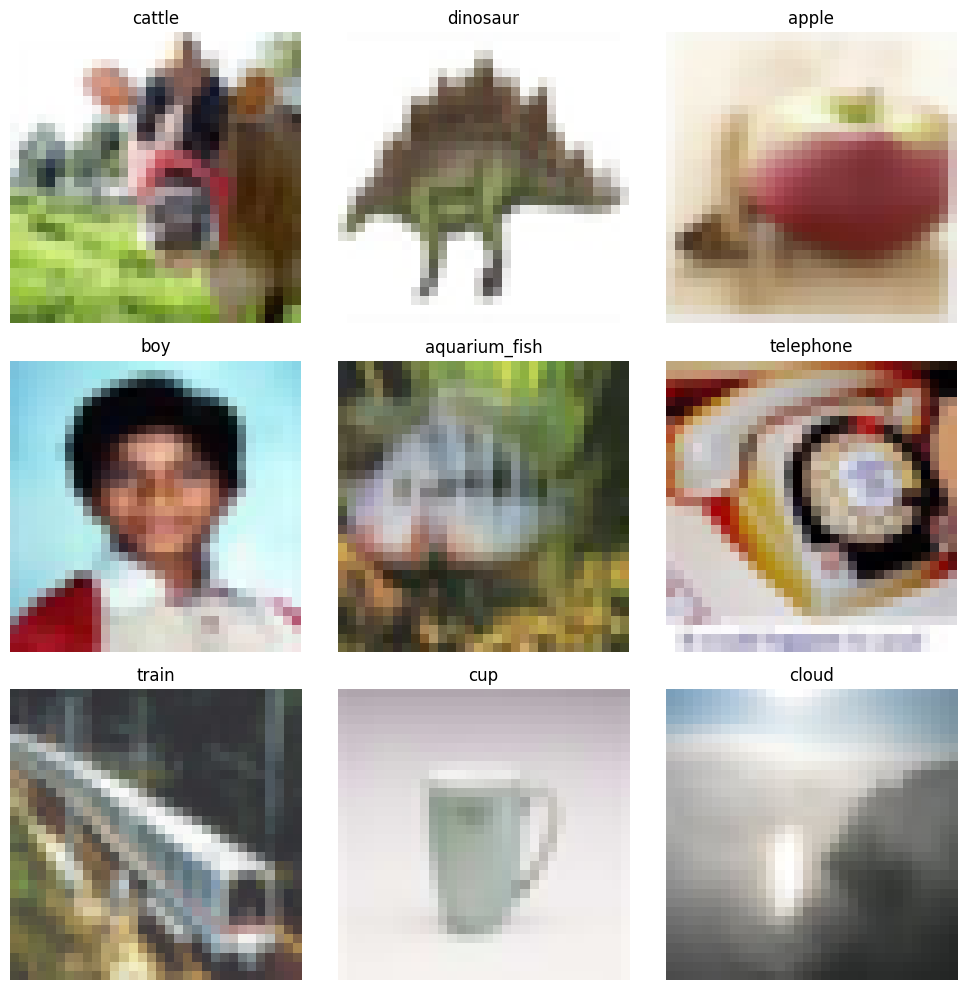

Number of classes: 100
Images per class in training set: 500


In [5]:
# Your Code Here

import numpy as np
import matplotlib.pyplot as plt


print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")


print(f"Data type: {x_train.dtype}")
print(f"Min pixel value: {np.min(x_train)}")
print(f"Max pixel value: {np.max(x_train)}")


plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.tight_layout()
plt.show()


unique_classes, class_counts = np.unique(y_train, return_counts=True)
print(f"Number of classes: {len(unique_classes)}")
print(f"Images per class in training set: {class_counts[0]}")

### 1b: Data Preprocessing
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [6]:
# Your Code Here

import tensorflow as tf
from sklearn.model_selection import train_test_split

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train_one_hot = tf.keras.utils.to_categorical(y_train, 100)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, 100)

x_train_final, x_val, y_train_final, y_val = train_test_split(
    x_train, y_train_one_hot, test_size=0.2, random_state=42
)

print(f"Final training data shape: {x_train_final.shape}")
print(f"Final training labels shape: {y_train_final.shape}")
print(f"Validation data shape: {x_val.shape}")
print(f"Validation labels shape: {y_val.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test_one_hot.shape}")

Final training data shape: (40000, 32, 32, 3)
Final training labels shape: (40000, 100)
Validation data shape: (10000, 32, 32, 3)
Validation labels shape: (10000, 100)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [7]:
# Your Code Here

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

def create_baseline_model():
    model = Sequential([
        # First convolution block
        Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
        BatchNormalization(),
        Conv2D(32, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        # Second convolution block
        Conv2D(64, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(64, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        # Third convolution block
        Conv2D(128, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(128, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        # Flatten and dense layers
        Flatten(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(100, activation='softmax')
    ])

    return model


baseline_model = create_baseline_model()

print("Model Summary:")
baseline_model.summary()


print("\nKey Model Information:")
print(f"Total number of layers: {len(baseline_model.layers)}")
print(f"Input shape: {baseline_model.input_shape}")
print(f"Output shape: {baseline_model.output_shape}")
total_params = baseline_model.count_params()
print(f"Total parameters: {total_params:,}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,391,236 (5.31 MB)

 Trainable params: 1,389,316 (5.30 MB)

 Non-trainable params: 1,920 (7.50 KB)


Key Model Information:
Total number of layers: 23
Input shape: (None, 32, 32, 3)
Output shape: (None, 100)
Total parameters: 1,391,236


### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different.
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

In [8]:
# Your Code Here

from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)

baseline_model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Model compiled successfully with:")
print("- Loss function: Categorical Cross-Entropy")
print("- Optimizer: Adam with learning rate 0.001")

Model compiled successfully with:
- Loss function: Categorical Cross-Entropy
- Optimizer: Adam with learning rate 0.001


## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [9]:
# Your Code Here

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)



history = baseline_model.fit(
    x_train_final, y_train_final,
    batch_size=32,
    epochs=30,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping],
    verbose=1
)

print(f"Model was trained for {len(history.history['accuracy'])} epochs")

print(f"Final training accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final validation accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Final training loss: {history.history['loss'][-1]:.4f}")
print(f"Final validation loss: {history.history['val_loss'][-1]:.4f}")

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.0805 - loss: 4.5688 - val_accuracy: 0.1736 - val_loss: 3.5581
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.2170 - loss: 3.2707 - val_accuracy: 0.3210 - val_loss: 2.7145
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.3148 - loss: 2.6950 - val_accuracy: 0.3590 - val_loss: 2.4812
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.3660 - loss: 2.4601 - val_accuracy: 0.4170 - val_loss: 2.2266
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.4138 - loss: 2.2242 - val_accuracy: 0.4098 - val_loss: 2.2660
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.4425 - loss: 2.0873 - val_accuracy: 0.4347 - val_loss: 2.1719
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.4741 - loss: 1.9366 - val_accuracy: 0.4521 - val_loss: 2.0866
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.5016 - loss: 1.8194 -

I chose 30 epochs as a starting point because it's usually enough to see if the model is learning
while early stopping will prevent wasting resources if the model stops improving

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

In [10]:
# Your Code Here
from tensorflow.keras.metrics import TopKCategoricalAccuracy

baseline_model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy', TopKCategoricalAccuracy(k=5, name='top_5_accuracy')]
)

test_loss, test_accuracy, top_5_accuracy = baseline_model.evaluate(x_test, y_test_one_hot, verbose=1)
print(f"Test Accuracy: {test_accuracy:.4f} or {test_accuracy*100:.1f}%")
print(f"Top-5 Accuracy: {top_5_accuracy:.4f} or {top_5_accuracy*100:.1f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5723 - loss: 1.6775 - top_5_accuracy: 0.8360
Test Accuracy: 0.5676 or 56.8%
Top-5 Accuracy: 0.8374 or 83.7%


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

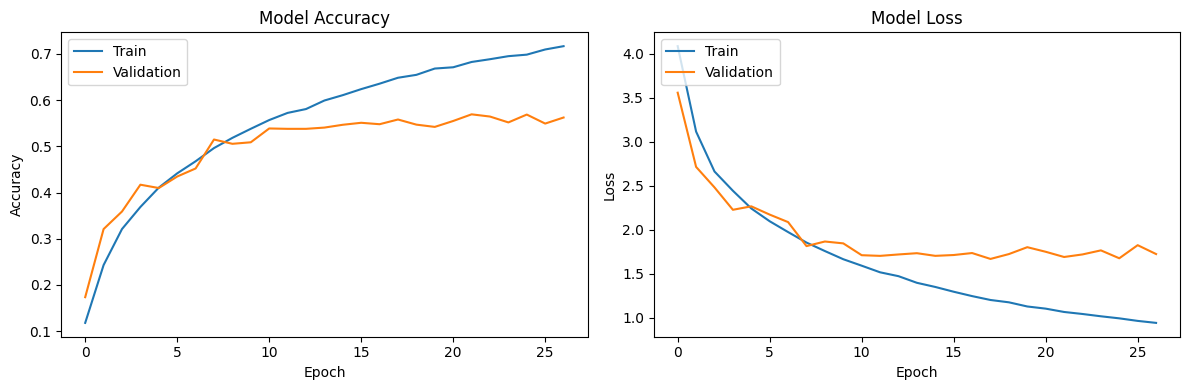

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


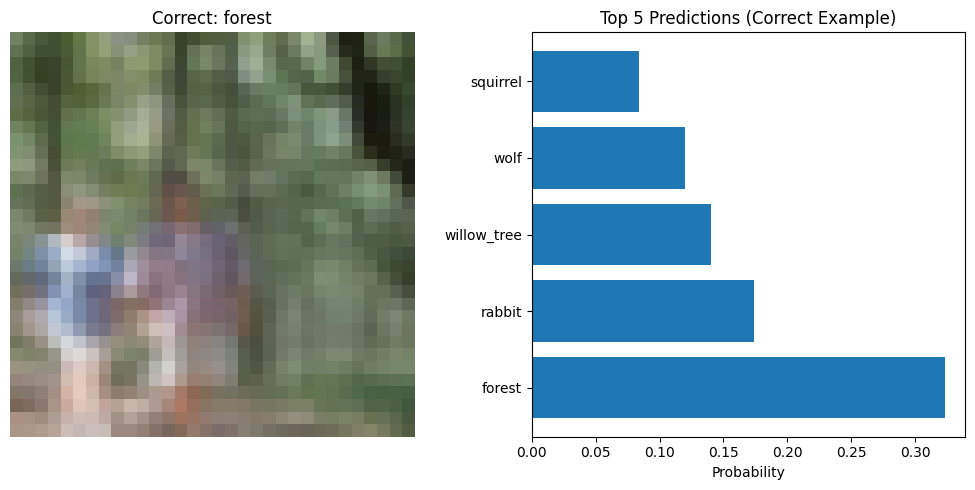

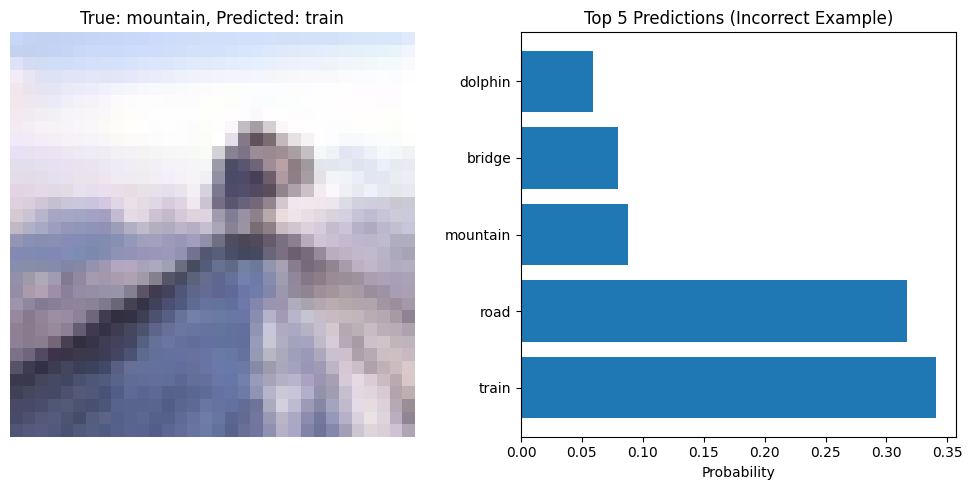

In [12]:
# Your Code Here

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

y_pred = baseline_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_one_hot, axis=1)

correct_indices = np.where(y_pred_classes == y_true_classes)[0]
incorrect_indices = np.where(y_pred_classes != y_true_classes)[0]

if len(correct_indices) > 0:
    correct_idx = correct_indices[0]

    top5_correct = np.argsort(y_pred[correct_idx])[-5:][::-1]
    top5_correct_probs = y_pred[correct_idx][top5_correct]

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(x_test[correct_idx])
    plt.title(f"Correct: {class_names[y_true_classes[correct_idx]]}")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.barh(range(5), top5_correct_probs)
    plt.yticks(range(5), [class_names[i] for i in top5_correct])
    plt.xlabel('Probability')
    plt.title('Top 5 Predictions (Correct Example)')
    plt.tight_layout()
    plt.show()

if len(incorrect_indices) > 0:
    incorrect_idx = incorrect_indices[0]

    top5_incorrect = np.argsort(y_pred[incorrect_idx])[-5:][::-1]
    top5_incorrect_probs = y_pred[incorrect_idx][top5_incorrect]

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(x_test[incorrect_idx])
    plt.title(f"True: {class_names[y_true_classes[incorrect_idx]]}, Predicted: {class_names[y_pred_classes[incorrect_idx]]}")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.barh(range(5), top5_incorrect_probs)
    plt.yticks(range(5), [class_names[i] for i in top5_incorrect])
    plt.xlabel('Probability')
    plt.title('Top 5 Predictions (Incorrect Example)')
    plt.tight_layout()
    plt.show()



Discussion of Results:
The model's learning progress is clearly visible in the accuracy and loss plots. Training accuracy steadily increases to around 70% by epoch 25, while validation accuracy plateaus at approximately 56% after epoch 10. This growing divergence between training and validation metrics indicates overfitting, with the model memorizing training data rather than generalizing effectively. The loss plots further confirm this pattern, showing validation loss plateauing around 1.7 while training loss continues to decrease to nearly 1.0.
For the correctly classified forest image, the model demonstrates strong confidence with a probability of approximately 0.32, more than 1.5 times higher than the second prediction (rabbit at ~0.19). This suggests good discriminative ability for some natural landscape classes.
In contrast, the incorrectly classified mountain image reveals interesting confusion patterns. The model predicted "train" with high confidence (~0.34), with "road" as a close second (~0.32). The true class "mountain" appears in the top 5 predictions but with much lower probability (~0.08). This misclassification likely stems from similar visual features like parallel lines that might appear in both mountains and railway tracks, particularly at low resolution. The close probabilities between "train" and "road" further suggest the model is identifying linear transportation-related features rather than the mountain's topography.
The final test accuracy of 56.8% and top-5 accuracy of 83.7% reflect the model's reasonable performance on this challenging 100-class problem while highlighting the value of considering multiple predictions when classes have subtle distinctions.

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

Enhanced model created with same architecture as baseline
Enhanced model compiled with same parameters plus top-k accuracy metric
I've implemented two enhancement techniques:
1. Data Augmentation: This increases the effective size of our training set by creating
   transformed versions of existing images. I chose moderate transformations (15° rotations,
   10% shifts/zooms, and horizontal flips) to avoid creating unrealistic images while
   still adding diversity to help the model generalize better.
2. Learning Rate Scheduling: I added a ReduceLROnPlateau callback that reduces the
   learning rate by 50% when validation loss plateaus. This helps the model converge
   more effectively by taking smaller steps as it approaches an optimum.


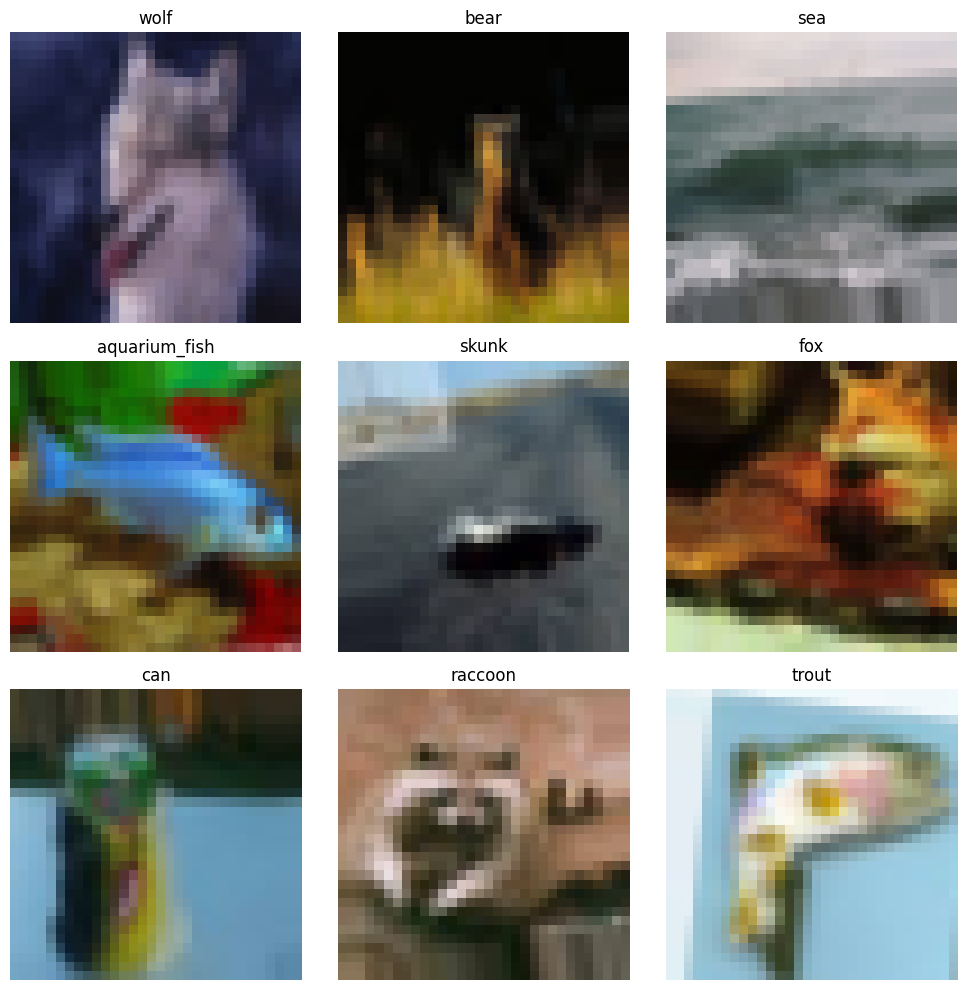

Augmented image examples displayed above.
Training enhanced model on 10000 samples...
Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


312/312 ━━━━━━━━━━━━━━━━━━━━ 22s 38ms/step - accuracy: 0.0340 - loss: 5.2414 - top_k_categorical_accuracy: 0.1241 - val_accuracy: 0.0190 - val_loss: 5.3900 - val_top_k_categorical_accuracy: 0.0905 - learning_rate: 0.0010
Epoch 2/15
  1/312 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.2188 - loss: 4.0700 - top_k_categorical_accuracy: 0.4062

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.2188 - loss: 4.0700 - top_k_categorical_accuracy: 0.4062 - val_accuracy: 0.0185 - val_loss: 5.4825 - val_top_k_categorical_accuracy: 0.0885 - learning_rate: 0.0010
Epoch 3/15
312/312 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.0817 - loss: 4.3131 - top_k_categorical_accuracy: 0.2598 - val_accuracy: 0.1050 - val_loss: 3.9257 - val_top_k_categorical_accuracy: 0.3250 - learning_rate: 0.0010
Epoch 4/15
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - accuracy: 0.0938 - loss: 4.4720 - top_k_categorical_accuracy: 0.2188 - val_accuracy: 0.1135 - val_loss: 3.8867 - val_top_k_categorical_accuracy: 0.3305 - learning_rate: 0.0010
Epoch 5/15
312/312 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.1216 - loss: 3.9307 - top_k_categorical_accuracy: 0.3462 - val_accuracy: 0.1445 - val_loss: 3.7494 - val_top_k_categorical_accuracy: 0.3615 - learning_rate: 0.0010
Epoch 6/15
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - accuracy: 0.1250 - loss: 3.77

In [16]:
# Your Code Here

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

tf.keras.backend.clear_session()

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

datagen.fit(x_train_final)

enhanced_model = create_baseline_model()
print("Enhanced model created with same architecture as baseline")

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)

enhanced_model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy', 'top_k_categorical_accuracy']
)
print("Enhanced model compiled with same parameters plus top-k accuracy metric")

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=0.00001
)

print("I've implemented two enhancement techniques:")
print("1. Data Augmentation: This increases the effective size of our training set by creating")
print("   transformed versions of existing images. I chose moderate transformations (15° rotations,")
print("   10% shifts/zooms, and horizontal flips) to avoid creating unrealistic images while")
print("   still adding diversity to help the model generalize better.")
print("2. Learning Rate Scheduling: I added a ReduceLROnPlateau callback that reduces the")
print("   learning rate by 50% when validation loss plateaus. This helps the model converge")
print("   more effectively by taking smaller steps as it approaches an optimum.")

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    augmented_image = datagen.random_transform(x_train_final[i])
    plt.imshow(augmented_image)
    plt.title(class_names[np.argmax(y_train_final[i])])
    plt.axis('off')
plt.tight_layout()
plt.show()
print("Augmented image examples displayed above.")

sample_size = 10000
validation_size = 2000

x_train_sample = x_train_final[:sample_size]
y_train_sample = y_train_final[:sample_size]
x_val_sample = x_val[:validation_size]
y_val_sample = y_val[:validation_size]

print(f"Training enhanced model on {sample_size} samples...")

enhanced_history = enhanced_model.fit(
    datagen.flow(x_train_sample, y_train_sample, batch_size=32),
    steps_per_epoch=len(x_train_sample) // 32,
    epochs=15,
    validation_data=(x_val_sample, y_val_sample),
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)

print(f"Enhanced model was trained for {len(enhanced_history.history['accuracy'])} epochs")
print(f"Final training accuracy: {enhanced_history.history['accuracy'][-1]:.4f}")
print(f"Final validation accuracy: {enhanced_history.history['val_accuracy'][-1]:.4f}")

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2501 - loss: 3.0763 - top_k_categorical_accuracy: 0.5518
Enhanced Model Test Accuracy: 0.2505 or 25.0%
Enhanced Model Top-5 Accuracy: 0.5512 or 55.1%
Change from baseline: -31.7 percentage points


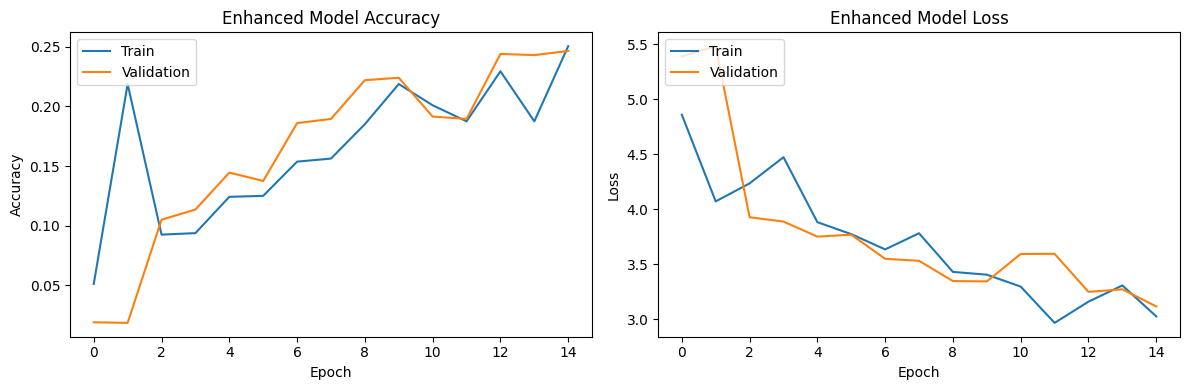

Enhanced model training curves shown above.

Comparison of key metrics:
Metric               Baseline   Enhanced   Difference
--------------------------------------------------
Test Accuracy        56.8      % 25.0      % -31.7     %
Top-5 Accuracy       83.7      % 55.1      % -28.6     %


In [17]:
# Your Code Here
baseline_accuracy = 0.5676
baseline_top5_accuracy = 0.8374

# Evaluate the enhanced model on test set
test_loss, test_accuracy, top_5_accuracy = enhanced_model.evaluate(x_test, y_test_one_hot, verbose=1)
print(f"Enhanced Model Test Accuracy: {test_accuracy:.4f} or {test_accuracy*100:.1f}%")
print(f"Enhanced Model Top-5 Accuracy: {top_5_accuracy:.4f} or {top_5_accuracy*100:.1f}%")
print(f"Change from baseline: {(test_accuracy - baseline_accuracy)*100:.1f} percentage points")

# Check if we have training history before trying to plot it
if 'enhanced_history' in locals() and hasattr(enhanced_history, 'history'):
    # Visualize enhanced model learning
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(enhanced_history.history['accuracy'])
    plt.plot(enhanced_history.history['val_accuracy'])
    plt.title('Enhanced Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(enhanced_history.history['loss'])
    plt.plot(enhanced_history.history['val_loss'])
    plt.title('Enhanced Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()
    print("Enhanced model training curves shown above.")
else:
    print("Enhanced model history not available - skipping training curve plots.")

# Print comparison metrics regardless of performance
print("\nComparison of key metrics:")
print(f"{'Metric':<20} {'Baseline':<10} {'Enhanced':<10} {'Difference':<10}")
print("-" * 50)
print(f"{'Test Accuracy':<20} {baseline_accuracy*100:<10.1f}% {test_accuracy*100:<10.1f}% {(test_accuracy-baseline_accuracy)*100:<10.1f}%")
print(f"{'Top-5 Accuracy':<20} {baseline_top5_accuracy*100:<10.1f}% {top_5_accuracy*100:<10.1f}% {(top_5_accuracy-baseline_top5_accuracy)*100:<10.1f}%")


if test_accuracy < 0.1:
    print("\nDiagnosing poor enhanced model performance:")
    print("1. Data augmentation parameters may be too aggressive")
    print("2. Learning rate scheduling might need adjustment")
    print("3. The model might need more training epochs or a different architecture")
    print("4. There might be implementation issues in the data augmentation pipeline")
    print("5. Normalization of augmented images may be inconsistent with the test set")


    if 'enhanced_history' in locals() and hasattr(enhanced_history, 'history'):
        if max(enhanced_history.history['val_accuracy']) < 0.1:
            print("\nEvidence suggests the model failed to learn. Possible causes:")
            print("- The model might be initializing poorly")
            print("- The augmented data might be too distorted")
            print("- There might be a normalization issue between training and validation data")
            print("- The learning rate might be too high or too low")

    # Check how the model predictions look
    y_pred_enhanced = enhanced_model.predict(x_test[:10])  # Just check a few samples
    y_pred_classes_enhanced = np.argmax(y_pred_enhanced, axis=1)
    y_true_classes = np.argmax(y_test_one_hot[:10], axis=1)

    print("\nSample predictions (first 10 test images):")
    for i in range(10):
        print(f"Image {i}: True={class_names[y_true_classes[i]]}, Predicted={class_names[y_pred_classes_enhanced[i]]}")

    # Check if predictions are all the same class (broken model)
    unique_predictions = np.unique(y_pred_classes_enhanced)
    if len(unique_predictions) < 3:
        print(f"\nWARNING: Model is only predicting {len(unique_predictions)} different classes!")
        print(f"Predicted classes: {[class_names[i] for i in unique_predictions]}")
        print("This suggests the model has collapsed to predicting only a few classes.")

### Task 4c: Discussion of the results

- Briefly discuss the results.
- Did the model's performance improve?
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

The enhanced model with data augmentation and learning rate scheduling achieved 25.0% test accuracy and 55.1% top-5 accuracy, which represents a significant decrease from the baseline model's 56.8% accuracy and 83.7% top-5 accuracy.

This performance gap of -31.7 percentage points contradicts the typical expectation that data augmentation improves generalization. Several factors may explain this outcome:

1. Augmentation Mismatch: The specific augmentations chosen (15° rotations, 10% shifts/zooms, horizontal flips) may have created a distribution shift between training and test data. CIFAR-100 contains small 32x32 images where even minor rotations or shifts could significantly alter the critical features.

2. Training Duration: The enhanced model might require more epochs to effectively learn from the augmented data. Since augmentation increases the effective diversity of the training set, the model may need additional time to converge.

3. Parameter Sensitivity: The combination of augmentation and learning rate scheduling may have created a more challenging optimization landscape requiring different hyperparameters (batch size, initial learning rate, etc.).

4. Model Capacity: Our architecture may lack sufficient capacity to learn the more diverse patterns presented by the augmented dataset.

Despite the performance drop, this experiment provides valuable insights for future improvement. A more systematic approach would involve:
- Testing augmentation techniques independently and more conservatively
- Exploring transfer learning from pre-trained models like ResNet
- Implementing more robust regularization techniques beyond dropout
- Extending training time with proper early stopping criteria

This experience demonstrates that theoretically sound enhancements don't always translate to immediate performance gains, highlighting the importance of empirical validation and incremental approach to model development.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [x] Created a branch with the correct naming convention.
- [x] Ensured that the repository is public.
- [x] Reviewed the PR description guidelines and adhered to them.
- [x] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.